In [1]:
import cvxpy as cp
import numpy as np
from time import time

from sklearn.base import BaseEstimator  # , TransformerMixin, ClassifierMixin
from sklearn.linear_model.base import LinearClassifierMixin
from sklearn.utils import check_X_y
from sklearn.utils.multiclass import check_classification_targets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification

from dwd.gen_dwd import GenDWD
from dwd.utils import pm1

In [2]:
# U = np.linspace(-10, 10, 100)
# plt.plot(V(U, 2))

In [3]:
params = {'n_features': 200,
          'n_redundant': 0,
          'n_classes': 2,
          'n_clusters_per_class': 1,
          'flip_y': .1,
          'class_sep': 1.0}

X, y = make_classification(n_samples=1000, random_state=0, **params)
# y = pm1(y)

In [4]:
dwd= GenDWD().fit(X, y)

In [7]:
np.mean(dwd.predict(X) == y)

0.898

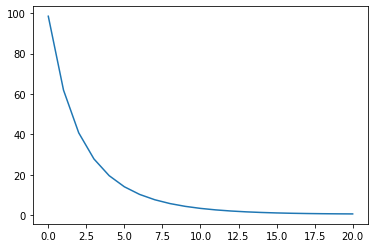

In [16]:
beta, offset, obj_vals, c = solve_gen_dwd_implicit_P(X, y, lambd=.5, q=2, max_iter=20)
plt.plot(obj_vals)


In [18]:
beta, offset, obj_vals, c = solve_gen_dwd_explicit_P(X, y, lambd=.5, q=2, max_iter=20)

# time testing

In [22]:
R = 10

params = {'n_features': 500,
          'n_redundant': 0,
          'n_classes': 2,
          'n_clusters_per_class': 1,
          'flip_y': .1,
          'class_sep': 1.0}


data = [make_classification(n_samples=1000, **params) for r in range(R)]

start_time = time()
for r in range(R):
    X, Y = data[r]
    beta, offset, obj_vals, c = solve_gen_dwd_explicit_P(X, y, lambd=.5, q=2, max_iter=100)
explicit_runtime = time() - start_time



start_time = time()
for r in range(R):
    X, Y = data[r]
    beta, offset, obj_vals, c = solve_gen_dwd_implicit_P(X, y, lambd=.5, q=2, max_iter=100)
implicit_runtime = time() - start_time

print('explicit: ', explicit_runtime/R)
print('implicit: ', implicit_runtime/R)


explicit:  0.3138312101364136
implicit:  0.8812527179718017


In [14]:
X.shape

(1000, 200)